In [ ]:
#imports
import pandas as pd
import numpy as np

#Training and testing
from sklearn.model_selection import train_test_split

#Logistic Regression
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

#Neural Network
import tensorflow as tf

#Bagging
from sklearn.ensemble import BaggingClassifier

#Boosting
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.ensemble import GradientBoostingClassifier      #GradientBoost
from sklearn.metrics import mean_squared_error as MSE
from sklearn.ensemble import AdaBoostClassifier              #AdaBoost
from xgboost import XGBClassifier                            #ExtremeGradientBoost

#Libraries for data visualisation
import seaborn as sns
#from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# IMPORTING THE DATA

In [ ]:
#Importing the data
path="/content/Waterquality.csv"
data=pd.read_csv(path,encoding='latin-1')
data

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1
7995,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1
7996,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1
7997,0.01,10,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1


In [ ]:
#Checking for Null values
data.isna().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

# CLEANING DATA

In [ ]:
data['is_safe'].value_counts()

0        7084
1         912
#NUM!       3
Name: is_safe, dtype: int64

In [ ]:
data['is_safe'] = data['is_safe'].replace(['#NUM!'],0)

In [ ]:
data['is_safe'].value_counts()

0    7084
1     912
0       3
Name: is_safe, dtype: int64

In [ ]:
data['ammonia'] = pd.to_numeric(data['ammonia'],errors='coerce').astype('float64')
data['is_safe'] = pd.to_numeric(data['is_safe'],errors='coerce').astype('int64')

In [ ]:
data.dtypes

aluminium      float64
ammonia        float64
arsenic        float64
barium         float64
cadmium        float64
chloramine     float64
chromium       float64
copper         float64
flouride       float64
bacteria       float64
viruses        float64
lead           float64
nitrates       float64
nitrites       float64
mercury        float64
perchlorate    float64
radium         float64
selenium       float64
silver         float64
uranium        float64
is_safe          int64
dtype: object

In [ ]:
data.isna().sum()

aluminium      0
ammonia        3
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

In [ ]:
data['ammonia']=data["ammonia"].fillna(np.mean(data["ammonia"]))

In [ ]:
data.isna().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

In [ ]:
data.shape

(7999, 21)

In [ ]:
for i in range(data.shape[1]):
  print(data.iloc[:,i].unique())

[1.65 2.32 1.01 1.36 0.92 0.94 2.36 3.93 0.6  0.22 3.27 1.35 1.88 4.93
 2.89 0.61 3.47 2.11 4.88 4.12 0.68 1.15 0.27 4.32 3.31 1.82 3.42 4.41
 4.57 1.69 1.87 2.71 1.63 0.01 4.49 3.52 4.35 2.51 2.34 1.71 3.45 3.37
 3.13 0.29 1.51 1.09 2.68 0.3  0.23 2.55 0.86 0.24 3.63 3.26 0.42 0.77
 0.58 3.82 2.78 3.62 3.88 4.64 2.25 0.54 4.62 2.5  3.08 3.03 2.85 1.38
 2.73 3.02 1.96 2.35 2.45 2.67 1.12 3.3  0.43 1.19 0.85 0.5  4.75 1.89
 3.75 3.32 1.75 2.66 2.76 2.63 0.04 0.88 2.22 4.91 4.8  0.47 1.62 0.09
 4.66 2.74 1.79 4.15 3.78 2.91 4.3  3.24 3.53 3.04 2.21 2.47 1.92 1.22
 2.12 4.19 4.21 4.07 2.56 3.55 3.94 0.8  2.59 3.9  3.15 0.18 3.86 1.25
 2.29 0.07 4.18 4.34 2.39 0.9  0.89 2.4  3.69 4.71 3.36 4.46 4.5  0.57
 2.69 2.17 1.32 5.   2.6  0.35 3.83 2.9  1.56 2.23 3.81 2.75 0.81 4.
 4.08 1.55 2.42 2.99 1.43 1.66 3.38 4.42 3.43 3.65 4.86 2.82 1.05 0.73
 1.21 2.15 3.6  1.73 3.35 0.37 0.79 0.99 1.86 4.84 3.09 1.72 3.29 0.11
 4.04 3.71 3.79 3.05 0.84 1.98 0.59 0.36 1.4  1.46 2.02 0.   0.93 0.78
 4.48 0.

# EDA

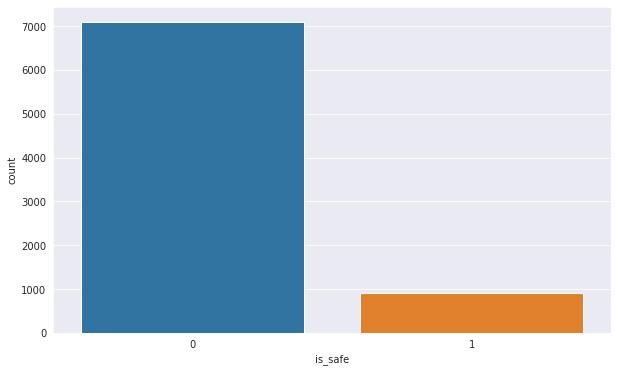

In [ ]:
  plt.rcParams['figure.figsize']=(10,6)
  sns.set_style('darkgrid')
  sns.countplot(x='is_safe',data=data)

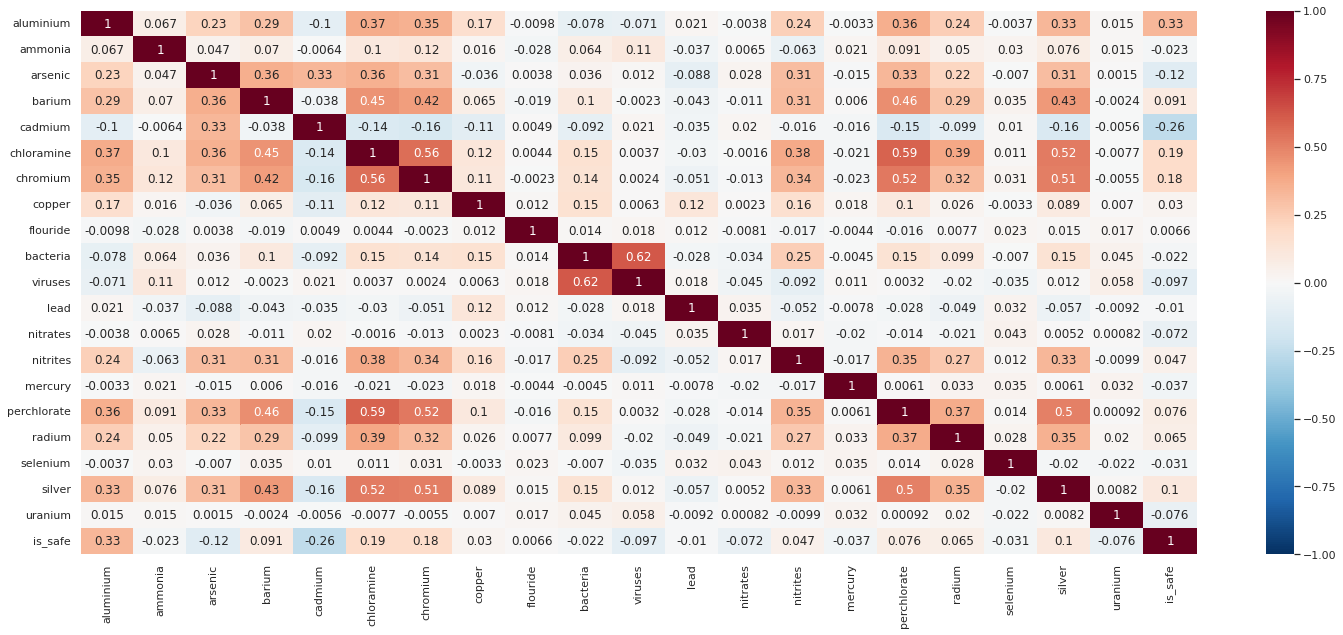

In [ ]:
sns.set(font_scale=1)
plt.figure(figsize=(25,10))
sns.heatmap(
    data.corr(),        
    cmap='RdBu_r', 
    annot=True, 
    vmin=-1, vmax=1);

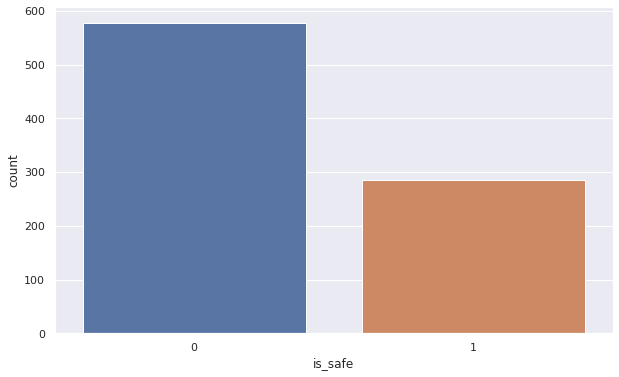

In [ ]:
plt.rcParams['figure.figsize']=(10,6)
sns.countplot(x='is_safe', data=data[(data.aluminium > 2.8)])

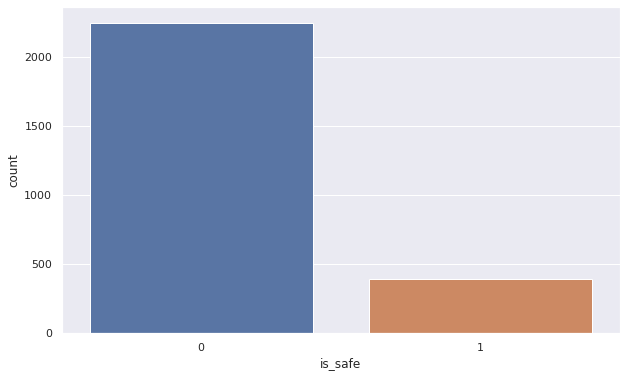

In [ ]:
plt.rcParams['figure.figsize']=(10,6)
sns.countplot(x='is_safe', data=data[(data.barium>2)])

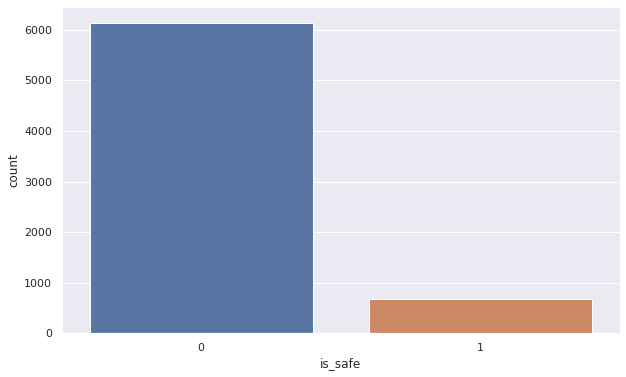

In [ ]:
plt.rcParams['figure.figsize']=(10,6)
sns.countplot(x='is_safe', data=data[(data.arsenic>0.01)])

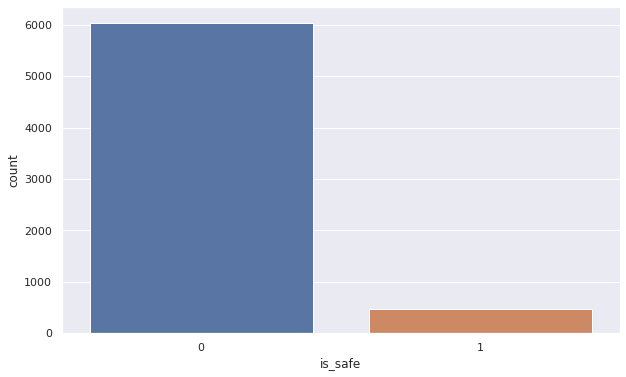

In [ ]:
plt.rcParams['figure.figsize']=(10,6)
sns.countplot(x='is_safe', data=data[(data.cadmium>0.005)])

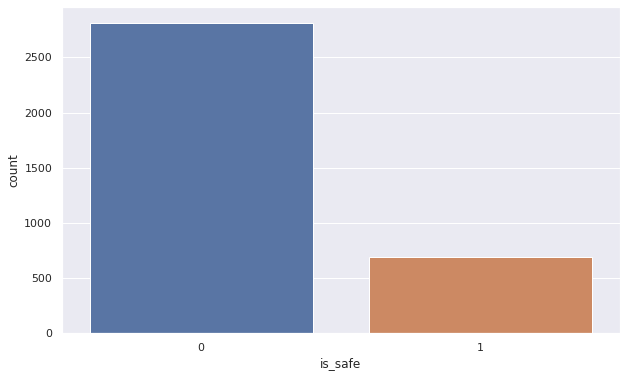

In [ ]:
plt.rcParams['figure.figsize']=(10,6)
sns.countplot(x='is_safe', data=data[(data.chromium>0.1)])

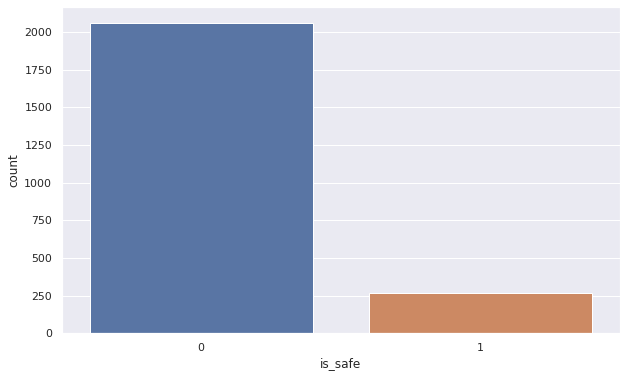

In [ ]:
plt.rcParams['figure.figsize']=(10,6)
sns.countplot(x='is_safe', data=data[(data.copper>1.3)])

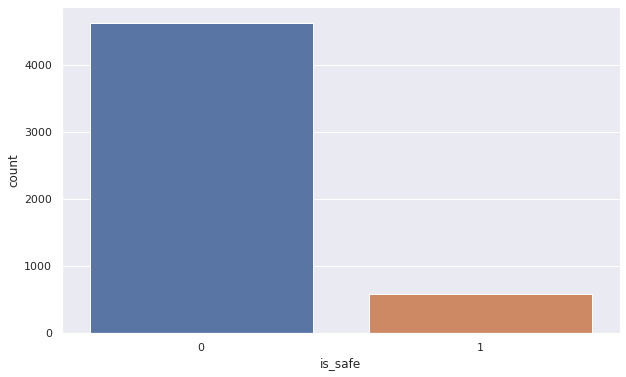

In [ ]:
plt.rcParams['figure.figsize']=(10,6)
sns.countplot(x='is_safe', data=data[(data.bacteria>0)])

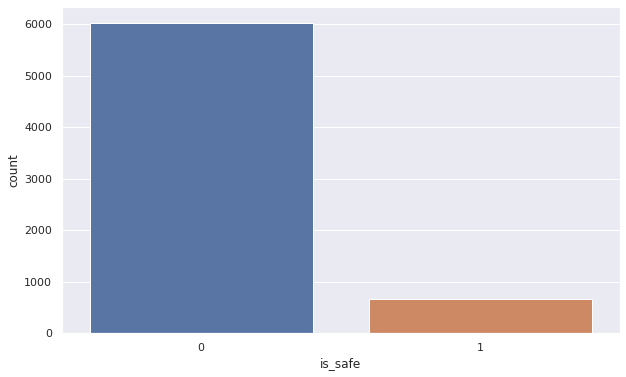

In [ ]:
plt.rcParams['figure.figsize']=(10,6)
sns.countplot(x='is_safe', data=data[(data.viruses>0)])

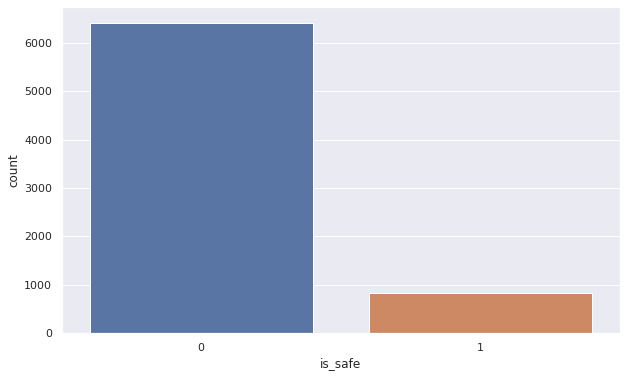

In [ ]:
plt.rcParams['figure.figsize']=(10,6)
sns.countplot(x='is_safe', data=data[(data.lead>0.015)])

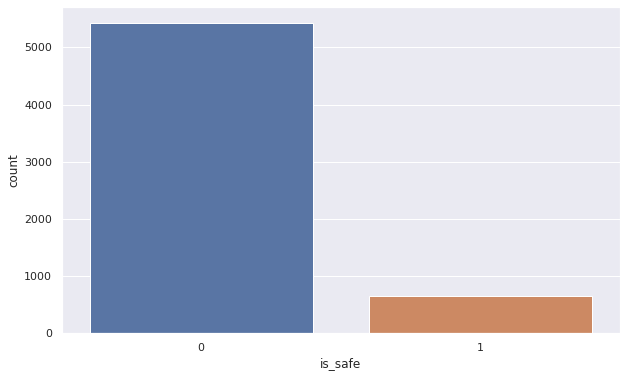

In [ ]:
plt.rcParams['figure.figsize']=(10,6)
sns.countplot(x='is_safe', data=data[(data.mercury>0.002)])

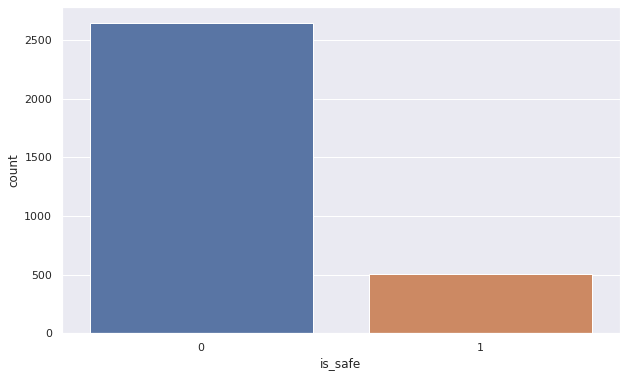

In [ ]:
plt.rcParams['figure.figsize']=(10,6)
sns.countplot(x='is_safe', data=data[(data.silver>0.1)])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

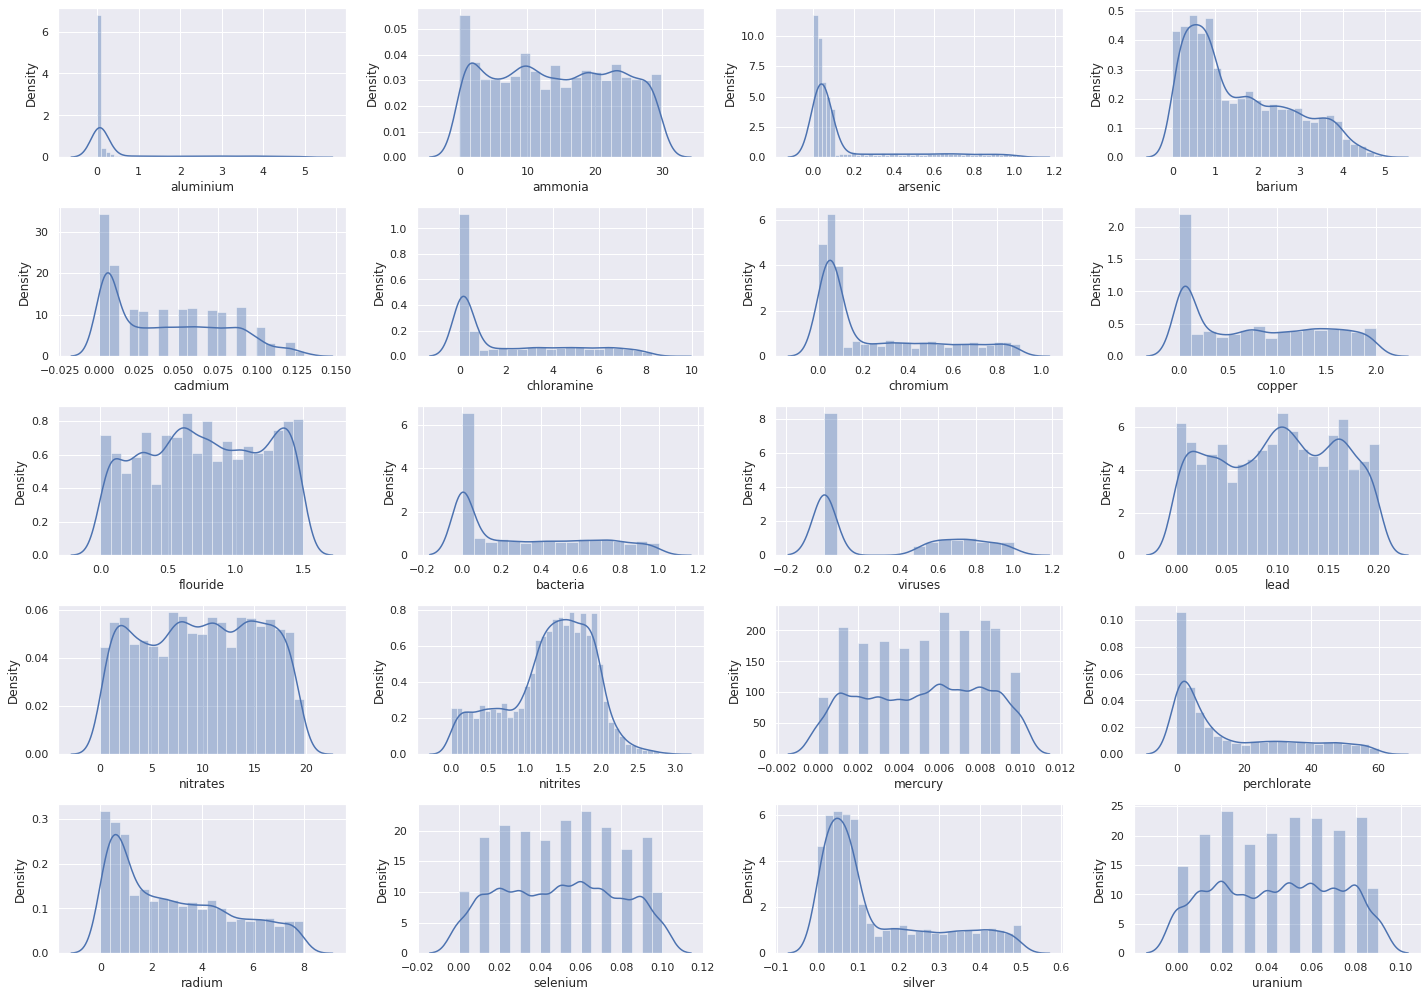

In [ ]:
fig, axes = plt.subplots(5, 4, figsize=(20, 14))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(data.columns[:-1]):
  plot = sns.distplot(data[c] ,ax=axes[i])
plt.tight_layout()

# PREDICTIVE ANALYSIS

In [ ]:
x= data.drop("is_safe", axis=1)
y=data["is_safe"]
x.head

<bound method NDFrame.head of       aluminium  ammonia  arsenic  barium  cadmium  chloramine  chromium  \
0          1.65     9.08     0.04    2.85    0.007        0.35      0.83   
1          2.32    21.16     0.01    3.31    0.002        5.28      0.68   
2          1.01    14.02     0.04    0.58    0.008        4.24      0.53   
3          1.36    11.33     0.04    2.96    0.001        7.23      0.03   
4          0.92    24.33     0.03    0.20    0.006        2.67      0.69   
...         ...      ...      ...     ...      ...         ...       ...   
7994       0.05     7.78     0.00    1.95    0.040        0.10      0.03   
7995       0.05    24.22     0.02    0.59    0.010        0.45      0.02   
7996       0.09     6.85     0.00    0.61    0.030        0.05      0.05   
7997       0.01    10.00     0.01    2.00    0.000        2.00      0.00   
7998       0.04     6.85     0.01    0.70    0.030        0.05      0.01   

      copper  flouride  bacteria  viruses   lead  nitrate

In [ ]:
y.head

<bound method NDFrame.head of 0       1
1       1
2       0
3       1
4       1
       ..
7994    1
7995    1
7996    1
7997    1
7998    1
Name: is_safe, Length: 7999, dtype: int64>

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.20, random_state=42)
y_test

4017    0
2577    0
3693    0
6574    0
7566    0
       ..
2913    0
1115    0
6759    0
6737    0
1467    0
Name: is_safe, Length: 1600, dtype: int64

## Logistic Regression

In [ ]:
logreg = LogisticRegression(C=1e9)
logreg.fit(x_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1000000000.0)

In [ ]:
y_pred = logreg.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
r2_score(y_test,y_pred)

0.05268620681874592

In [ ]:
accuracy_score(y_test,y_pred)

0.8975

## Neural Network

In [ ]:
tf.random.set_seed(45)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(20, activation='relu'),
                            tf.keras.layers.Dense(13, activation='relu'),
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(3, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP1: Fit the model

history= model.fit(x_train, y_train, epochs= 550)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/550
200/200 [==============================] - 2s 3ms/step - loss: 0.2844 - accuracy: 0.8919 - precision: 0.6190 - a=recall: 0.0730
Epoch 2/550
200/200 [==============================] - 1s 3ms/step - loss: 0.2512 - accuracy: 0.9006 - precision: 0.6473 - a=recall: 0.2346
Epoch 3/550
200/200 [==============================] - 1s 2ms/step - loss: 0.2289 - accuracy: 0.9089 - precision: 0.7295 - a=recall: 0.2879
Epoch 4/550
200/200 [==============================] - 1s 3ms/step - loss: 0.2207 - accuracy: 0.9139 - precision: 0.7268 - a=recall: 0.3624
Epoch 5/550
200/200 [==============================] - 1s 3ms/step - loss: 0.2131 - accuracy: 0.9176 - precision: 0.7354 - a=recall: 0.4059
Epoch 6/550
200/200 [==============================] - 1s 3ms/step - loss: 0.2124 - accuracy: 0.9208 - precision: 0.7690 - a=recall: 0.4115
Epoch 7/550
200/200 [==============================] - 1s 3ms/step - loss: 0.2011 - accuracy: 0.9266 - precision: 0.7895 - a=recall: 0.4635
Epoch 8/550
200/200 

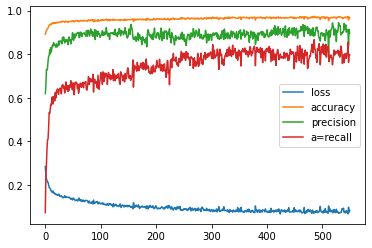

In [ ]:
pd.DataFrame(history.history).plot();

## Bagging

In [ ]:
#bagging
bag_model = BaggingClassifier(
base_estimator=BaggingClassifier(),
n_estimators=500,
max_samples=0.5,
bootstrap=True,
oob_score=True,
random_state=42
)
l=bag_model.fit(x_train, y_train)
l.score(x_test,y_test)

0.95125

## Boosting

In [ ]:
#gradientBoosting
GradientBoostingClassifier,
Classifier = GradientBoostingClassifier(
    max_depth=2,
    n_estimators=1000,
    learning_rate=0.1,
    random_state=42
)
l=Classifier.fit(x_train, y_train)    
l.score(x_test,y_test)

0.959375

In [ ]:
#Ada Boosting
adaclf = AdaBoostClassifier(
    n_estimators=1000,
    learning_rate=0.1,
    random_state=42)
l=adaclf.fit(x_train, y_train)
y_pred_1 = adaclf.predict(x_test)
print("Accuracy:",adaclf.score(x_test,y_test))

Accuracy: 0.9325


In [ ]:
#ExtremeGradientBoosting
egb =XGBClassifier(
    n_estimators=1000,
    learning_rate=0.1,
    random_state=42)
l=egb.fit(x_train, y_train)
y_pred_1 = egb.predict(x_test)
l.score(x_test,y_test)

0.966875

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)
model=RandomForestClassifier(n_estimators=100)
c=model.fit(x_train,y_train)
y_pred=c.predict(x_test)
print('Accuracy of model is',metrics.accuracy_score(y_test,y_pred))

Accuracy of model is 0.956875


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(x_train, y_train)
y_pred_gini = clf_gini.predict(x_test)
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))
y_pred_train_gini = clf_gini.predict(x_train)

y_pred_train_gini
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Model accuracy score with criterion gini index: 0.9375
Training-set accuracy score: 0.9417


## SVM

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import svm
svc=svm.SVC(kernel='linear')
model=svc.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred
print('Accuracy of model is',metrics.accuracy_score(y_test,y_pred))

Accuracy of model is 0.899375


## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

y_pred = knn.predict(x_test)
y_pred
print('Accuracy',metrics.accuracy_score(y_test,y_pred))

Accuracy 0.85


In [ ]:
k_list = list(range(1,50))
k_values = dict(n_neighbors=k_list)
print(k_values.keys()),
print(k_values.values())
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(knn, k_values, cv=5, scoring='accuracy')
grid
grid.fit(data.drop('is_safe', axis=1), data.is_safe)
grid.cv_results_
for key in grid.cv_results_.keys():
  print(key) 
grid_table = pd.DataFrame(grid.cv_results_)
grid_table.head()
grid_table_rank = grid_table[['params','mean_test_score','std_test_score','rank_test_score']].loc[grid_table['rank_test_score']==1].sort_values(by='std_test_score', ascending=True)
grid_table_rank


dict_keys(['n_neighbors'])
dict_values([[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]])
mean_fit_time
std_fit_time
mean_score_time
std_score_time
param_n_neighbors
params
split0_test_score
split1_test_score
split2_test_score
split3_test_score
split4_test_score
mean_test_score
std_test_score
rank_test_score


,params,mean_test_score,std_test_score,rank_test_score
47,{'n_neighbors': 48},0.885861,0.00049,1


In [ ]:
print("The best value of k = {} with {} of accuracy.".format(grid.best_params_,grid.best_score_))
print("The best classifier is: {}".format(grid.best_estimator_))

The best value of k = {'n_neighbors': 48} with 0.8858607723577236 of accuracy.
The best classifier is: KNeighborsClassifier(n_neighbors=48)


## graph using gridsearch wid KNN

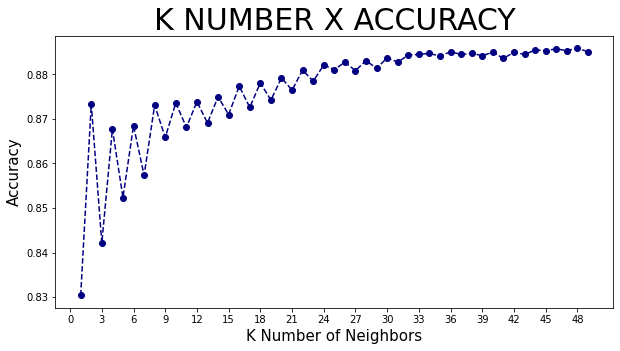

In [ ]:
graphic = grid.cv_results_['mean_test_score']
graphic

plt.figure(figsize=(10,5))
plt.plot(k_list,graphic,color='navy',linestyle='dashed',marker='o')
plt.xlabel('K Number of Neighbors', fontdict={'fontsize': 15})
plt.ylabel('Accuracy', fontdict={'fontsize': 15})
plt.title('K NUMBER X ACCURACY', fontdict={'fontsize': 30})
plt.xticks(range(0,50,3),)
#plt.xaxis.set_major_locator(MultipleLocator(3))
plt.show()